In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
pop_attrs = {
    "age": [x for x in range(6,96)],
    "sex": ["m", "f", "na"]
}

def attrs_selector(pop_attrs):
    res = {}
    for k, v in pop_attrs.items():
        res[k] = np.random.choice(v)
    return res

In [3]:
print(attrs_selector(pop_attrs))
print(attrs_selector(pop_attrs))
print(attrs_selector(pop_attrs))

{'age': np.int64(30), 'sex': np.str_('m')}
{'age': np.int64(21), 'sex': np.str_('f')}
{'age': np.int64(44), 'sex': np.str_('m')}


In [4]:
class agent:
    def __init__(self, attributes_dict):
        self.keys = attributes_dict.keys()
        for k, v in attributes_dict.items():
            setattr(self, k, v)

    def __str__(self):
        repr = "agent:\n"
        for k in self.keys:
            repr += f"  {k}: {getattr(self, k)}\n"
        return repr

In [5]:
a = agent({"first": 1, "second": "m", "third": 1.23})
print(a.first, a.second, a.third)

1 m 1.23


In [6]:
b = agent(attrs_selector(pop_attrs))
print(b.age, b.sex)
print(b)

95 f
agent:
  age: 95
  sex: f



In [7]:
def generate_pop(pop_attrs, n=100):
    res = [agent(attrs_selector(pop_attrs)) for i in range(n)]
    return res

In [8]:
p = generate_pop(pop_attrs, 10)
print([x.age for x in p])
print("".join([str(x) for x in p]))

[np.int64(17), np.int64(28), np.int64(12), np.int64(72), np.int64(10), np.int64(87), np.int64(25), np.int64(60), np.int64(58), np.int64(81)]
agent:
  age: 17
  sex: na
agent:
  age: 28
  sex: f
agent:
  age: 12
  sex: na
agent:
  age: 72
  sex: f
agent:
  age: 10
  sex: f
agent:
  age: 87
  sex: na
agent:
  age: 25
  sex: f
agent:
  age: 60
  sex: m
agent:
  age: 58
  sex: f
agent:
  age: 81
  sex: f



In [9]:
def generate_pop_sample(pop, n=10):
    return np.random.choice(pop, n)

In [10]:
p = generate_pop(pop_attrs, 100)
sp = generate_pop_sample(p, 10)
print([x.age for x in sp])

[np.int64(43), np.int64(47), np.int64(43), np.int64(80), np.int64(35), np.int64(11), np.int64(41), np.int64(47), np.int64(39), np.int64(32)]


In [13]:
def pop_stats(pop):
    n = len(pop)
    avgs = {}
    stdvs = {}
    counts = {}
    for k in pop[0].keys:
        try:
            avgs[k] = np.average([getattr(x, k) for x in pop])
        except TypeError as e:
            pass
        try:
            stdvs[k] = np.std([getattr(x, k) for x in pop])
        except TypeError as e:
            pass
        # counts
        _vals = [getattr(x, k) for x in pop]
        _counts = np.unique(_vals, return_counts=True)
        counts[k] = {k:v for k,v in zip(list(_counts[0]), list(_counts[1]))}

    return {"averages": avgs, "stds": stdvs, "counts": counts}

In [14]:
p = generate_pop(pop_attrs, 100)
print(pop_stats(p))

{'averages': {'age': np.float64(51.93)}, 'stds': {'age': np.float64(23.711286342162037)}, 'counts': {'age': {np.int64(6): np.int64(2), np.int64(7): np.int64(2), np.int64(9): np.int64(1), np.int64(13): np.int64(1), np.int64(14): np.int64(2), np.int64(18): np.int64(1), np.int64(19): np.int64(2), np.int64(21): np.int64(1), np.int64(23): np.int64(2), np.int64(24): np.int64(1), np.int64(25): np.int64(1), np.int64(26): np.int64(1), np.int64(27): np.int64(1), np.int64(29): np.int64(1), np.int64(31): np.int64(2), np.int64(32): np.int64(3), np.int64(34): np.int64(1), np.int64(37): np.int64(2), np.int64(38): np.int64(1), np.int64(39): np.int64(2), np.int64(40): np.int64(1), np.int64(41): np.int64(4), np.int64(42): np.int64(2), np.int64(43): np.int64(1), np.int64(44): np.int64(2), np.int64(45): np.int64(3), np.int64(46): np.int64(1), np.int64(47): np.int64(1), np.int64(48): np.int64(1), np.int64(50): np.int64(2), np.int64(51): np.int64(3), np.int64(52): np.int64(1), np.int64(53): np.int64(2), np.

In [16]:
def trials(pop, n_sample=10, n_trials=100):
    a = pop_stats(pop)
    res = []
    for t in range(n_trials):
        _pop = generate_pop_sample(pop, n_sample)
        res.append(pop_stats(_pop))
    return a, res

p = generate_pop(pop_attrs, 1000)
print(trials(p, 10, 100))

({'averages': {'age': np.float64(50.059)}, 'stds': {'age': np.float64(25.588230087288178)}, 'counts': {'age': {np.int64(6): np.int64(5), np.int64(7): np.int64(16), np.int64(8): np.int64(7), np.int64(9): np.int64(5), np.int64(10): np.int64(15), np.int64(11): np.int64(12), np.int64(12): np.int64(9), np.int64(13): np.int64(11), np.int64(14): np.int64(15), np.int64(15): np.int64(10), np.int64(16): np.int64(10), np.int64(17): np.int64(16), np.int64(18): np.int64(18), np.int64(19): np.int64(15), np.int64(20): np.int64(6), np.int64(21): np.int64(14), np.int64(22): np.int64(10), np.int64(23): np.int64(4), np.int64(24): np.int64(13), np.int64(25): np.int64(16), np.int64(26): np.int64(12), np.int64(27): np.int64(11), np.int64(28): np.int64(8), np.int64(29): np.int64(8), np.int64(30): np.int64(14), np.int64(31): np.int64(11), np.int64(32): np.int64(15), np.int64(33): np.int64(13), np.int64(34): np.int64(7), np.int64(35): np.int64(15), np.int64(36): np.int64(10), np.int64(37): np.int64(12), np.int

In [17]:
def average_estimates(pop, n_sample=10, n_trials=100, keys=[]):
    pop, samples = trials(pop, n_sample, n_trials)
    res = {}
    for k in keys:
        res[k] = {"data": [], "std": 0, "n": n_sample}
        for s in samples:
            res[k]["data"].append(s["averages"][k])
        res[k]["std"] = np.std(res[k]["data"])
    return res
p = generate_pop(pop_attrs, 1000)
print(average_estimates(p, n_sample=10, n_trials=100, keys=["age"]))

{'age': {'data': [np.float64(54.4), np.float64(41.0), np.float64(65.3), np.float64(55.4), np.float64(58.9), np.float64(51.8), np.float64(49.1), np.float64(41.3), np.float64(52.2), np.float64(50.5), np.float64(52.1), np.float64(62.8), np.float64(63.2), np.float64(64.4), np.float64(61.4), np.float64(43.5), np.float64(58.3), np.float64(47.7), np.float64(60.3), np.float64(45.5), np.float64(57.0), np.float64(45.4), np.float64(39.5), np.float64(47.9), np.float64(52.7), np.float64(58.9), np.float64(47.9), np.float64(34.4), np.float64(36.7), np.float64(36.8), np.float64(46.7), np.float64(57.7), np.float64(40.4), np.float64(56.6), np.float64(48.9), np.float64(61.1), np.float64(53.2), np.float64(50.5), np.float64(49.0), np.float64(43.3), np.float64(59.4), np.float64(42.4), np.float64(47.7), np.float64(55.1), np.float64(61.5), np.float64(57.6), np.float64(65.9), np.float64(61.0), np.float64(50.9), np.float64(51.2), np.float64(52.3), np.float64(60.2), np.float64(60.2), np.float64(54.3), np.float64

## Show $\frac{1}{\sqrt{n}}$ scaling

In [18]:
def scaling(pop, n_samples=[100, 500], n_trials=100, keys=[]):
    data = []
    for n in n_samples:
        data.append(average_estimates(p, n, n_trials, keys=keys))
    res = {}
    for k in keys:
        res[k] = []
        for d in data:
            res[k].append([ d[k]["n"], d[k]["std"] ])
    return res

print(scaling(p, n_samples=[10, 100, 200, 400, 600], n_trials=100, keys=["age"]))

{'age': [[10, np.float64(7.849833819897081)], [100, np.float64(2.765544836013331)], [200, np.float64(1.6483981398618475)], [400, np.float64(1.3851063713664737)], [600, np.float64(1.0594766768970845)]]}


[-0.50157024  3.25982543]


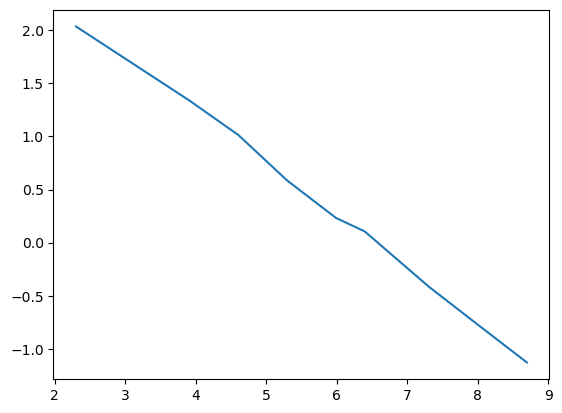

In [19]:
p = generate_pop(pop_attrs, 10000)
x = np.array(scaling(p, n_samples=[10, 50, 100, 200, 400, 600, 1500, 3000, 6000], n_trials=200, keys=["age"])["age"]).T
y = np.log(x)
A = np.vstack([y[0], np.ones(len(y[0]))]).T
print(np.linalg.lstsq(A, y[1], rcond=None)[0])
plt.plot(y[0], y[1])

## The Questions

1. For a population sample...
2. For a target attribute... e.g. age
3. For a population bisecting set of conditions on 0 or more attributes... e.g. M/F
4. Is the target attribute significantly different between pop1 and pop2?

### What is significant?

- How well do the sample population attributes estimate the population attributes?
- What is the smallest subsample we will need to use to estimate?

In [20]:
conditions_dict = {"sex":("m", "na")}

def pop_bisector(pop, conditions_dict):
    pop1 = []
    pop2 = []
    for p in pop:
        pop_flags = []
        for k,v in conditions_dict.items():
            if isinstance(v, tuple):
                if getattr(p, k) in v:
                    pop_flags.append(True)
                else:
                    pop_flags.append(False)
            else:
                # single number then less-than-equal is pop1
                if getattr(p, k) <= v:
                    pop_flags.append(True)
                else:
                    pop_flags.append(False)
        if all(pop_flags):
            pop1.append(p)
        else:
            pop2.append(p)
    return pop1, pop2

In [21]:
pop_attrs = {
    "age": [x for x in range(6,96)],
    "color": ["red", "yellow", "green"],
    "sex": ["m", "f", "na"]
}
p = generate_pop(pop_attrs, 20)

In [22]:
print("test 1 - m or na")
conditions_dict = {"sex":("m", "na")}
a, b = pop_bisector(p, conditions_dict)
print("".join([str(x) for x in a]))
print("".join([str(x) for x in b]))

test 1 - m or na
agent:
  age: 95
  color: yellow
  sex: m
agent:
  age: 92
  color: yellow
  sex: na
agent:
  age: 10
  color: green
  sex: m
agent:
  age: 85
  color: yellow
  sex: m
agent:
  age: 20
  color: red
  sex: m
agent:
  age: 84
  color: green
  sex: na
agent:
  age: 71
  color: yellow
  sex: na
agent:
  age: 67
  color: red
  sex: na
agent:
  age: 82
  color: yellow
  sex: m
agent:
  age: 89
  color: yellow
  sex: m
agent:
  age: 15
  color: green
  sex: na
agent:
  age: 60
  color: yellow
  sex: na

agent:
  age: 33
  color: red
  sex: f
agent:
  age: 61
  color: red
  sex: f
agent:
  age: 9
  color: yellow
  sex: f
agent:
  age: 33
  color: yellow
  sex: f
agent:
  age: 10
  color: green
  sex: f
agent:
  age: 36
  color: green
  sex: f
agent:
  age: 74
  color: yellow
  sex: f
agent:
  age: 72
  color: yellow
  sex: f



In [23]:
print("test 2 - (m or na) and yellow")
conditions_dict = {"sex":("m", "na"), "color": ("yellow",)}
a, b = pop_bisector(p, conditions_dict)
print("".join([str(x) for x in a]))
print("".join([str(x) for x in b]))

test 2 - (m or na) and yellow
agent:
  age: 95
  color: yellow
  sex: m
agent:
  age: 92
  color: yellow
  sex: na
agent:
  age: 85
  color: yellow
  sex: m
agent:
  age: 71
  color: yellow
  sex: na
agent:
  age: 82
  color: yellow
  sex: m
agent:
  age: 89
  color: yellow
  sex: m
agent:
  age: 60
  color: yellow
  sex: na

agent:
  age: 33
  color: red
  sex: f
agent:
  age: 61
  color: red
  sex: f
agent:
  age: 9
  color: yellow
  sex: f
agent:
  age: 10
  color: green
  sex: m
agent:
  age: 33
  color: yellow
  sex: f
agent:
  age: 20
  color: red
  sex: m
agent:
  age: 84
  color: green
  sex: na
agent:
  age: 10
  color: green
  sex: f
agent:
  age: 67
  color: red
  sex: na
agent:
  age: 36
  color: green
  sex: f
agent:
  age: 15
  color: green
  sex: na
agent:
  age: 74
  color: yellow
  sex: f
agent:
  age: 72
  color: yellow
  sex: f



In [24]:
print("test 3 - (m or nq) and <= 42")
conditions_dict = {"sex":("m", "na"), "age": 42}
a, b = pop_bisector(p, conditions_dict)
print("".join([str(x) for x in a]))
print("".join([str(x) for x in b]))

test 3 - (m or nq) and <= 42
agent:
  age: 10
  color: green
  sex: m
agent:
  age: 20
  color: red
  sex: m
agent:
  age: 15
  color: green
  sex: na

agent:
  age: 33
  color: red
  sex: f
agent:
  age: 61
  color: red
  sex: f
agent:
  age: 95
  color: yellow
  sex: m
agent:
  age: 9
  color: yellow
  sex: f
agent:
  age: 92
  color: yellow
  sex: na
agent:
  age: 33
  color: yellow
  sex: f
agent:
  age: 85
  color: yellow
  sex: m
agent:
  age: 84
  color: green
  sex: na
agent:
  age: 71
  color: yellow
  sex: na
agent:
  age: 10
  color: green
  sex: f
agent:
  age: 67
  color: red
  sex: na
agent:
  age: 82
  color: yellow
  sex: m
agent:
  age: 89
  color: yellow
  sex: m
agent:
  age: 36
  color: green
  sex: f
agent:
  age: 74
  color: yellow
  sex: f
agent:
  age: 72
  color: yellow
  sex: f
agent:
  age: 60
  color: yellow
  sex: na

